In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

In [3]:
import sort_dataframeby_monthorweek as sd

In [4]:
df = pd.read_csv(r'C:\Users\rishi\Downloads\Projects\Hotel Booking\hotel_bookings.csv')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df.fillna(0,inplace = True)

In [8]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [9]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [10]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [11]:
filter = (df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0 )

In [12]:
data = df[~filter]

In [13]:
resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]


In [14]:
labels = resort['country'].value_counts().index
values = resort['country'].value_counts()

In [15]:
trace = go.Pie(labels = labels, values = values, hoverinfo = 'label+percent', textinfo = 'value')

In [16]:
iplot([trace])

In [17]:
country_wise_data = data[data['is_canceled'] == 0]['country'].value_counts().reset_index()

In [18]:
country_wise_data.columns = ['country','No of Guests']

In [19]:
country_wise_data

country  No of Guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
161     MDG             1
162     GUY             1
163     BDI             1
164     DJI             1
165     LCA             1

[166 rows x 2 columns]

In [20]:
px.choropleth(country_wise_data, locations = country_wise_data['country'], 
              color = country_wise_data['No of Guests'], 
              hover_name = country_wise_data['country'],
              title = 'Guest Home Country'
             )

In [21]:
data2 = data[data['is_canceled'] == 0]

Text(0, 0.5, 'Price in [EUR]')

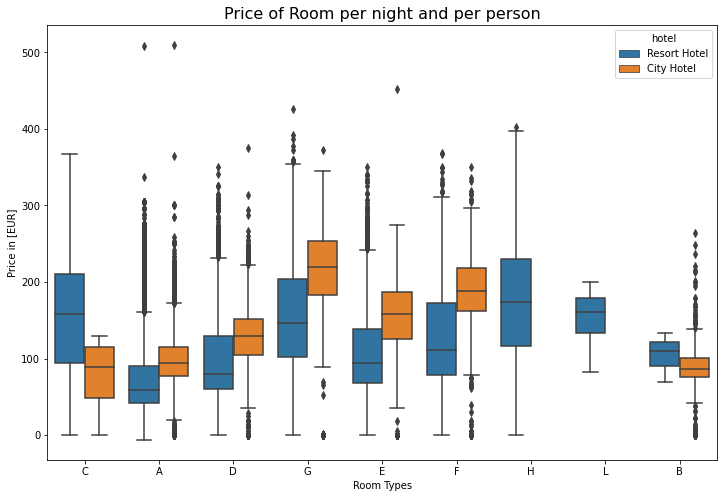

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'reserved_room_type', y = 'adr' , data = data2, hue = 'hotel')
plt.title ('Price of Room per night and per person' , fontsize = 16)
plt.xlabel('Room Types')
plt.ylabel('Price in [EUR]')

In [23]:
data_resort = resort[resort['is_canceled'] == 0]
data_city = city[city['is_canceled'] == 0]

In [24]:
resort_hotel = data_resort.groupby('arrival_date_month')['adr'].mean().reset_index()
city_hotel = data_city.groupby('arrival_date_month')['adr'].mean().reset_index()

In [25]:
final = resort_hotel.merge(city_hotel, on = 'arrival_date_month')

In [26]:
final.columns = ['months','price of resort', 'price of city hotel']
final

months  price of resort  price of city hotel
0       April        75.867816           111.962267
1      August       181.205892           118.674598
2    December        68.410104            88.401855
3    February        54.147478            86.520062
4     January        48.761125            82.330983
5        July       150.122528           115.818019
6        June       107.974850           117.874360
7       March        57.056838            90.658533
8         May        76.657558           120.669827
9    November        48.706289            86.946592
10    October        61.775449           102.004672
11  September        96.416860           112.776582

In [27]:
final = sd.Sort_Dataframeby_Month(final,'months')

In [28]:
final

months  price of resort  price of city hotel
0     January        48.761125            82.330983
1    February        54.147478            86.520062
2       March        57.056838            90.658533
3       April        75.867816           111.962267
4         May        76.657558           120.669827
5        June       107.974850           117.874360
6        July       150.122528           115.818019
7      August       181.205892           118.674598
8   September        96.416860           112.776582
9     October        61.775449           102.004672
10   November        48.706289            86.946592
11   December        68.410104            88.401855

In [29]:
px.line(final, x = 'months', y = ['price of resort', 'price of city hotel'], title = 'Room price per night over the year' )

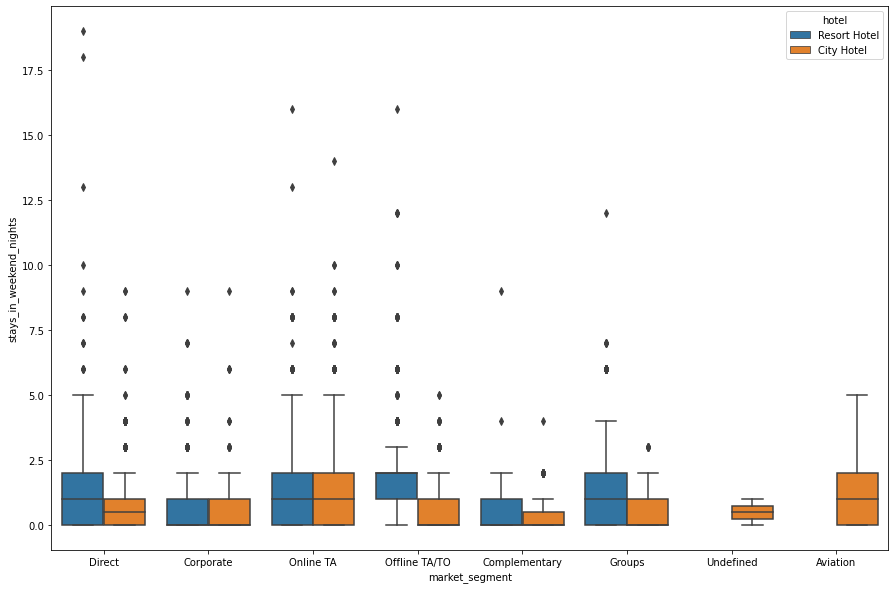

In [30]:
plt.figure(figsize = (15,10))
sns.boxplot ( x = 'market_segment', y = 'stays_in_weekend_nights', data = data , hue = 'hotel')

In [31]:
data['meal'].value_counts()

BB           92236
HB           14458
SC           10549
Undefined     1169
FB             798
Name: meal, dtype: int64

In [32]:
px.pie(data, values = data['meal'].value_counts(), names = data['meal'].value_counts().index , hole = 0.5 )

In [33]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    0.0     0.0                    0     Transient   0.0   
1    0.0     0.0                    0     Transient   0.0   
2    0.0     0.0                    0     Transient  75.0   
3  304.0     0.0                    0     Transient  75.0   
4  240.0     0.0                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

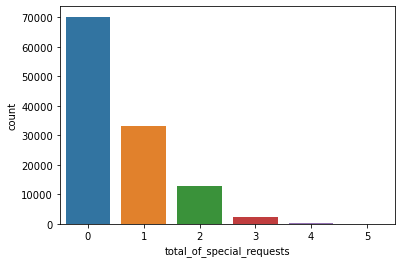

In [34]:
sns.countplot(data['total_of_special_requests'])

In [35]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [36]:
pivot_table = data.groupby(['total_of_special_requests','is_canceled']).agg({'total_of_special_requests':'count'}).rename({'total_of_special_requests':'count'}).unstack()

Text(0.5, 1.0, 'Booking with special request canceled')

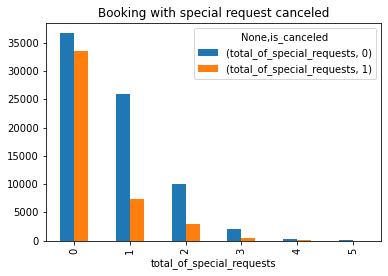

In [37]:
pivot_table.plot(kind = 'bar')
plt.title ('Booking with special request canceled')

In [38]:
data_resort.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    0.0     0.0                    0     Transient   0.0   
1    0.0     0.0                    0     Transient   0.0   
2    0.0     0.0                    0     Transient  75.0   
3  304.0     0.0                    0     Transient  75.0   
4  240.0     0.0                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [39]:
rush_resort = data_resort['arrival_date_month'].value_counts().reset_index()
rush_city = data_city['arrival_date_month'].value_counts().reset_index()

In [40]:
rush_resort = sd.Sort_Dataframeby_Month(rush_resort,'index')
rush_city = sd.Sort_Dataframeby_Month(rush_city,'index')

In [41]:
rush_city

index  arrival_date_month
0     January                2249
1    February                3051
2       March                4049
3       April                4010
4         May                4568
5        June                4358
6        July                4770
7      August                5367
8   September                4283
9     October                4326
10   November                2676
11   December                2377

In [42]:
rush_resort

index  arrival_date_month
0     January                1866
1    February                2308
2       March                2571
3       April                2550
4         May                2535
5        June                2037
6        July                3137
7      August                3257
8   September                2102
9     October                2575
10   November                1975
11   December                2014

In [43]:
final_rush = rush_resort.merge(rush_city, on = 'index')

In [44]:
final_rush = sd.Sort_Dataframeby_Month(final_rush,'index')

In [45]:
final_rush.columns = ['Month', 'Guest in Resort', 'Guest in City Hotel']

In [46]:
final_rush

Month  Guest in Resort  Guest in City Hotel
0     January             1866                 2249
1    February             2308                 3051
2       March             2571                 4049
3       April             2550                 4010
4         May             2535                 4568
5        June             2037                 4358
6        July             3137                 4770
7      August             3257                 5367
8   September             2102                 4283
9     October             2575                 4326
10   November             1975                 2676
11   December             2014                 2377

In [47]:
px.line(final_rush, x = 'Month', y = ['Guest in Resort', 'Guest in City Hotel'] , title = 'Total No of Guest per month')

In [48]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    0.0     0.0                    0     Transient   0.0   
1    0.0     0.0                    0     Transient   0.0   
2    0.0     0.0                    0     Transient  75.0   
3  304.0     0.0                    0     Transient  75.0   
4  240.0     0.0                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [49]:
filter = data['is_canceled'] == 0
clean_data = data[filter]

In [50]:
clean_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    0.0     0.0                    0     Transient   0.0   
1    0.0     0.0                    0     Transient   0.0   
2    0.0     0.0                    0     Transient  75.0   
3  304.0     0.0                    0     Transient  75.0   
4  240.0     0.0                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [51]:
clean_data['total_nights'] = clean_data['stays_in_weekend_nights'] + clean_data['stays_in_week_nights']


<ipython-input-51-cb2fc743c721>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
stay = clean_data.groupby(['total_nights','hotel']).agg('count').reset_index( )
stay = stay.iloc[:,0:3]
stay.head()

total_nights         hotel  is_canceled
0             0    City Hotel          251
1             0  Resort Hotel          371
2             1    City Hotel         9155
3             1  Resort Hotel         6579
4             2    City Hotel        10983

In [53]:
stay.columns = ['total_nights','hotel','number of stays']

In [54]:
stay.head()

total_nights         hotel  number of stays
0             0    City Hotel              251
1             0  Resort Hotel              371
2             1    City Hotel             9155
3             1  Resort Hotel             6579
4             2    City Hotel            10983

Text(0.5, 1.0, 'How long people stay in a hotel')

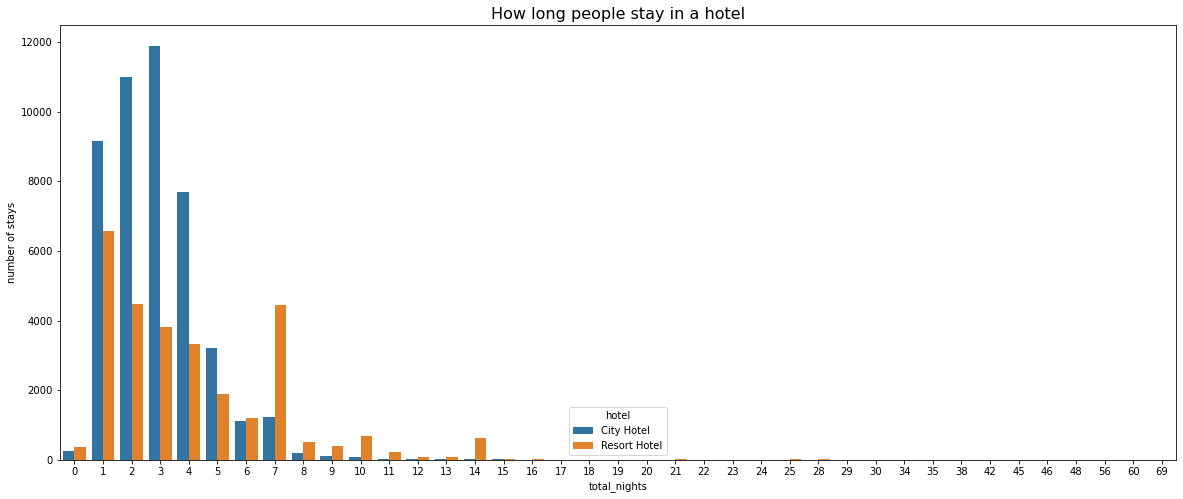

In [55]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'total_nights', y = 'number of stays', hue = 'hotel', hue_order = ['City Hotel','Resort Hotel'] ,data = stay)
plt.title ("How long people stay in a hotel", fontsize = 16)

In [56]:
clean_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_nights'],
      dtype='object')

In [57]:
clean_data['market_segment'].value_counts()

Online TA        35673
Offline TA/TO    15880
Direct           10648
Groups            7697
Corporate         4291
Complementary      639
Aviation           183
Name: market_segment, dtype: int64

In [58]:
px.pie(clean_data, values = clean_data['market_segment'].value_counts(), 
       names = clean_data['market_segment'].value_counts().index, 
       title = 'Bookings per market segment' )

In [59]:
clean_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_nights'],
      dtype='object')

Text(0.5, 1.0, 'Price of room and reservation person type')

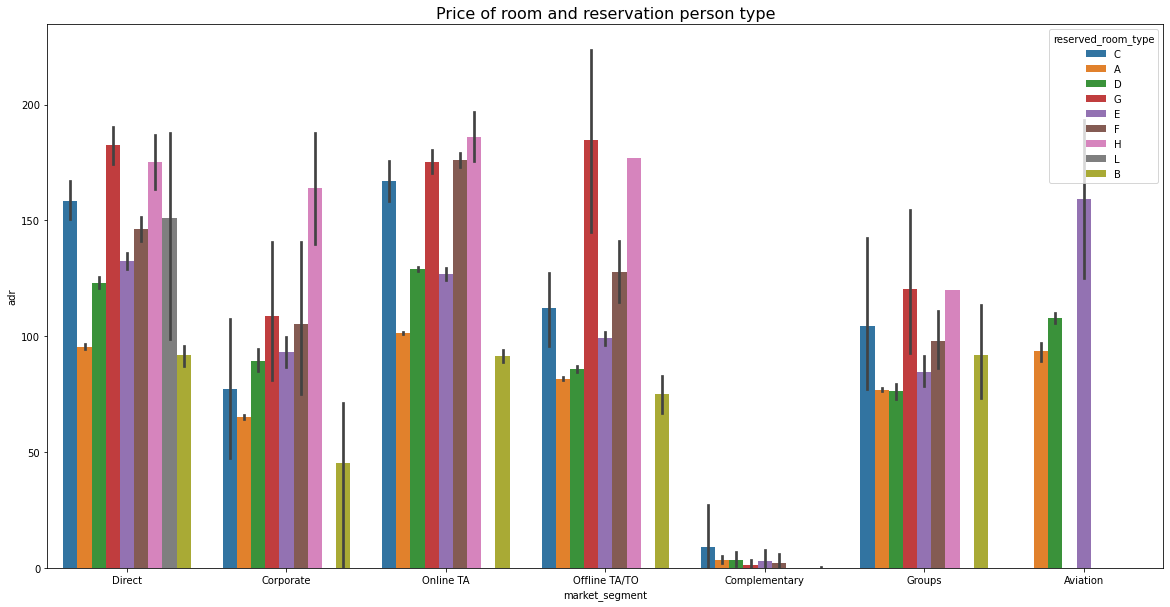

In [60]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'market_segment', y = 'adr', hue = 'reserved_room_type' ,data = clean_data )
plt.title ("Price of room and reservation person type", fontsize = 16)

In [61]:
filter = data['is_canceled'] == 1
canceled = data[filter]

In [62]:
Resort_cancel = len(canceled[canceled['hotel'] == 'Resort Hotel'])

In [63]:
City_cancel = len(canceled[canceled['hotel'] == 'City Hotel'])

In [64]:
px.pie (values=[Resort_cancel,City_cancel], names = ['Resort Hotel Cancelled','City Hotel Cancelled'])

In [65]:
canceled

hotel  is_canceled  lead_time  arrival_date_year  \
8       Resort Hotel            1         85               2015   
9       Resort Hotel            1         75               2015   
10      Resort Hotel            1         23               2015   
27      Resort Hotel            1         60               2015   
32      Resort Hotel            1         96               2015   
...              ...          ...        ...                ...   
108829    City Hotel            1         25               2017   
111355    City Hotel            1          4               2017   
111924    City Hotel            1          7               2017   
111925    City Hotel            1          6               2017   
117295    City Hotel            1          0               2017   

       arrival_date_month  arrival_date_week_number  \
8                    July                        27   
9                    July                        27   
10                   July                        27   
27                   July                        27   
32                   July                        27   
...                   ...                       ...   
108829                May                        18   
111355               June                        23   
111924                May                        22   
111925               July                        29   
117295             August                        31   

        arrival_date_day_of_month  stays_in_weekend_nights  \
8                               1                        0   
9                               1                        0   
10                              1                        0   
27                              1                        2   
32                              1                        2   
...                           ...                      ...   
108829                          6                        2   
111355                          5                        1   
111924                         31                        0   
111925                         17                        1   
117295                          2                        0   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
8                          3       2  ...    No Deposit  240.0     0.0   
9                          3       2  ...    No Deposit   15.0     0.0   
10                         4       2  ...    No Deposit  240.0     0.0   
27                         5       2  ...    No Deposit  240.0     0.0   
32                         8       2  ...    No Deposit    0.0     0.0   
...                      ...     ...  ...           ...    ...     ...   
108829                     1       1  ...    No Deposit    0.0   450.0   
111355                     0       1  ...    No Deposit    0.0   238.0   
111924                     1       1  ...    No Deposit    0.0   238.0   
111925                     0       1  ...    No Deposit    0.0   238.0   
117295                     2       1  ...    No Deposit    0.0    40.0   

       days_in_waiting_list customer_type    adr  required_car_parking_spaces  \
8                         0     Transient   82.0                            0   
9                         0     Transient  105.5                            0   
10                        0     Transient  123.0                            0   
27                        0     Transient  107.0                            0   
32                        0     Transient  108.3                            0   
...                     ...           ...    ...                          ...   
108829                    0     Transient  125.0                            0   
111355                    0     Transient   65.0                            0   
111924                    0     Transient   65.0                            0   
111925                    0     Transient   65.0                            0   
117295                  

AttributeError: 'SeriesGroupBy' object has no attribute 'reset_index'

In [68]:
data_resort_canceled = canceled[(canceled['hotel'] == 'Resort Hotel') & (canceled['is_canceled'] == 1)]
data_city_canceled = canceled[(canceled['hotel'] == 'City Hotel') & (canceled['is_canceled'] == 1)]
data_resort_canceled

hotel  is_canceled  lead_time  arrival_date_year  \
8      Resort Hotel            1         85               2015   
9      Resort Hotel            1         75               2015   
10     Resort Hotel            1         23               2015   
27     Resort Hotel            1         60               2015   
32     Resort Hotel            1         96               2015   
...             ...          ...        ...                ...   
32682  Resort Hotel            1          0               2017   
32684  Resort Hotel            1          0               2017   
32835  Resort Hotel            1         20               2017   
34707  Resort Hotel            1          0               2017   
36837  Resort Hotel            1        258               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
8                   July                        27                          1   
9                   July                        27                          1   
10                  July                        27                          1   
27                  July                        27                          1   
32                  July                        27                          1   
...                  ...                       ...                        ...   
32682              March                        12                         20   
32684              March                        12                         20   
32835           February                         6                          7   
34707             August                        34                         24   
36837                May                        22                         31   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
8                            0                     3       2  ...   
9                            0                     3       2  ...   
10                           0                     4       2  ...   
27                           2                     5       2  ...   
32                           2                     8       2  ...   
...                        ...                   ...     ...  ...   
32682                        1                     0       1  ...   
32684                        1                     0       1  ...   
32835                        0                     1       2  ...   
34707                        0                     1       1  ...   
36837                        2                     4       2  ...   

       deposit_type  agent company days_in_waiting_list customer_type     adr  \
8        No Deposit  240.0     0.0                    0     Transient   82.00   
9        No Deposit   15.0     0.0                    0     Transient  105.50   
10       No Deposit  240.0     0.0                    0     Transient  123.00   
27       No Deposit  240.0     0.0                    0     Transient  107.00   
32       No Deposit    0.0     0.0                    0     Transient  108.30   
...             ...    ...     ...                  ...           ...     ...   
32682    No Deposit    0.0    88.0                    0     Transient   35.00   
32684    No Deposit    0.0    88.0                    0     Transient   35.00   
32835    No Deposit  250.0     0.0                    0     Transient   45.00   
34707    No Deposit    0.0     0.0                    0     Transient  190.00   
36837    No Deposit  143.0     0.0                    0     Transient   68.95   

       required_car_parking_spaces  total_of_special_requests  \
8                                0                          1   
9                                0                          0   
10                               0                          0   
27                               0                          2   
32                               0                          2   
...                            ...                      

In [69]:
data_resort_canceled = data_resort_canceled.groupby('arrival_date_month').agg('count').reset_index( )
data_city_canceled = data_city_canceled.groupby('arrival_date_month').agg('count').reset_index( )
data_resort_canceled = data_resort_canceled.iloc[:,0:2]
data_city_canceled = data_city_canceled.iloc[:,0:2]

In [70]:
data_resort_canceled

arrival_date_month  hotel
0               April   1059
1              August   1637
2            December    631
3            February    794
4             January    325
5                July   1436
6                June   1007
7               March    763
8                 May   1024
9            November    460
10            October    978
11          September   1006

In [71]:
data_city_canceled

arrival_date_month  hotel
0               April   3459
1              August   3600
2            December   1737
3            February   1899
4             January   1481
5                July   3301
6                June   3527
7               March   2385
8                 May   3653
9            November   1660
10            October   3268
11          September   3109

In [72]:
data_resort_canceled_sort = sd.Sort_Dataframeby_Month(data_resort_canceled,'arrival_date_month')
data_city_canceled_sort = sd.Sort_Dataframeby_Month(data_city_canceled,'arrival_date_month')
final_cancel_merge = data_resort_canceled_sort.merge(data_city_canceled_sort, on = 'arrival_date_month')
final_cancel_merge

arrival_date_month  hotel_x  hotel_y
0             January      325     1481
1            February      794     1899
2               March      763     2385
3               April     1059     3459
4                 May     1024     3653
5                June     1007     3527
6                July     1436     3301
7              August     1637     3600
8           September     1006     3109
9             October      978     3268
10           November      460     1660
11           December      631     1737

In [73]:
final_cancel_merge.columns = ['months', 'resort','city']

In [74]:
final_cancel_merge

months  resort  city
0     January     325  1481
1    February     794  1899
2       March     763  2385
3       April    1059  3459
4         May    1024  3653
5        June    1007  3527
6        July    1436  3301
7      August    1637  3600
8   September    1006  3109
9     October     978  3268
10   November     460  1660
11   December     631  1737

In [75]:
px.line(final_cancel_merge , x = 'months', y = ['resort','city'], title = "No of Cancelations")